In [39]:
import pandas as pd

In [40]:
df=pd.read_csv("accident.csv")

In [41]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [42]:
df.describe()

,Age,Speed_of_Impact,Survived
count,200.00000,197.000000,200.00000
mean,43.42500,70.441624,0.50500
std,14.94191,30.125298,0.50123
min,18.00000,20.000000,0.00000
25%,31.00000,43.000000,0.00000
50%,43.50000,71.000000,1.00000
75%,56.00000,95.000000,1.00000
max,69.00000,119.000000,1.00000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [44]:
df.isnull().sum()/len(df)

Age                0.000
Gender             0.005
Speed_of_Impact    0.015
Helmet_Used        0.000
Seatbelt_Used      0.000
Survived           0.000
dtype: float64

In [45]:
df.isnull().sum()

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [46]:
df=df.dropna()

In [47]:
df.isnull().sum()

Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

# Univariate Analysis


In [48]:
import seaborn as sns


<Axes: xlabel='Gender', ylabel='count'>

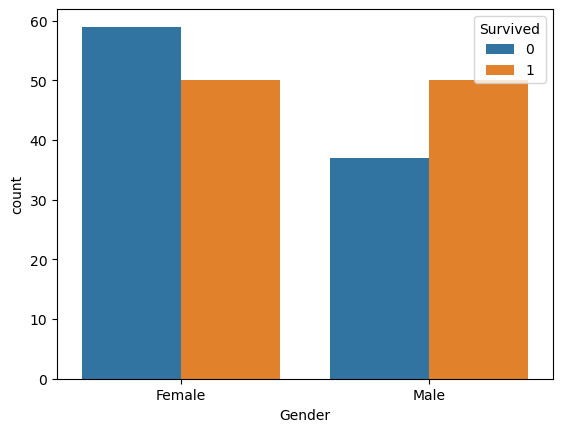

In [49]:
sns.countplot(data=df,x='Gender',hue='Survived')

<Axes: ylabel='count'>

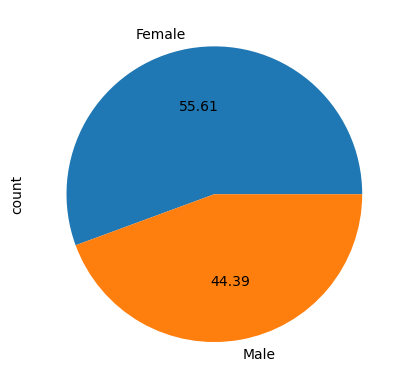

In [50]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

accidents of females are more than accidents of males

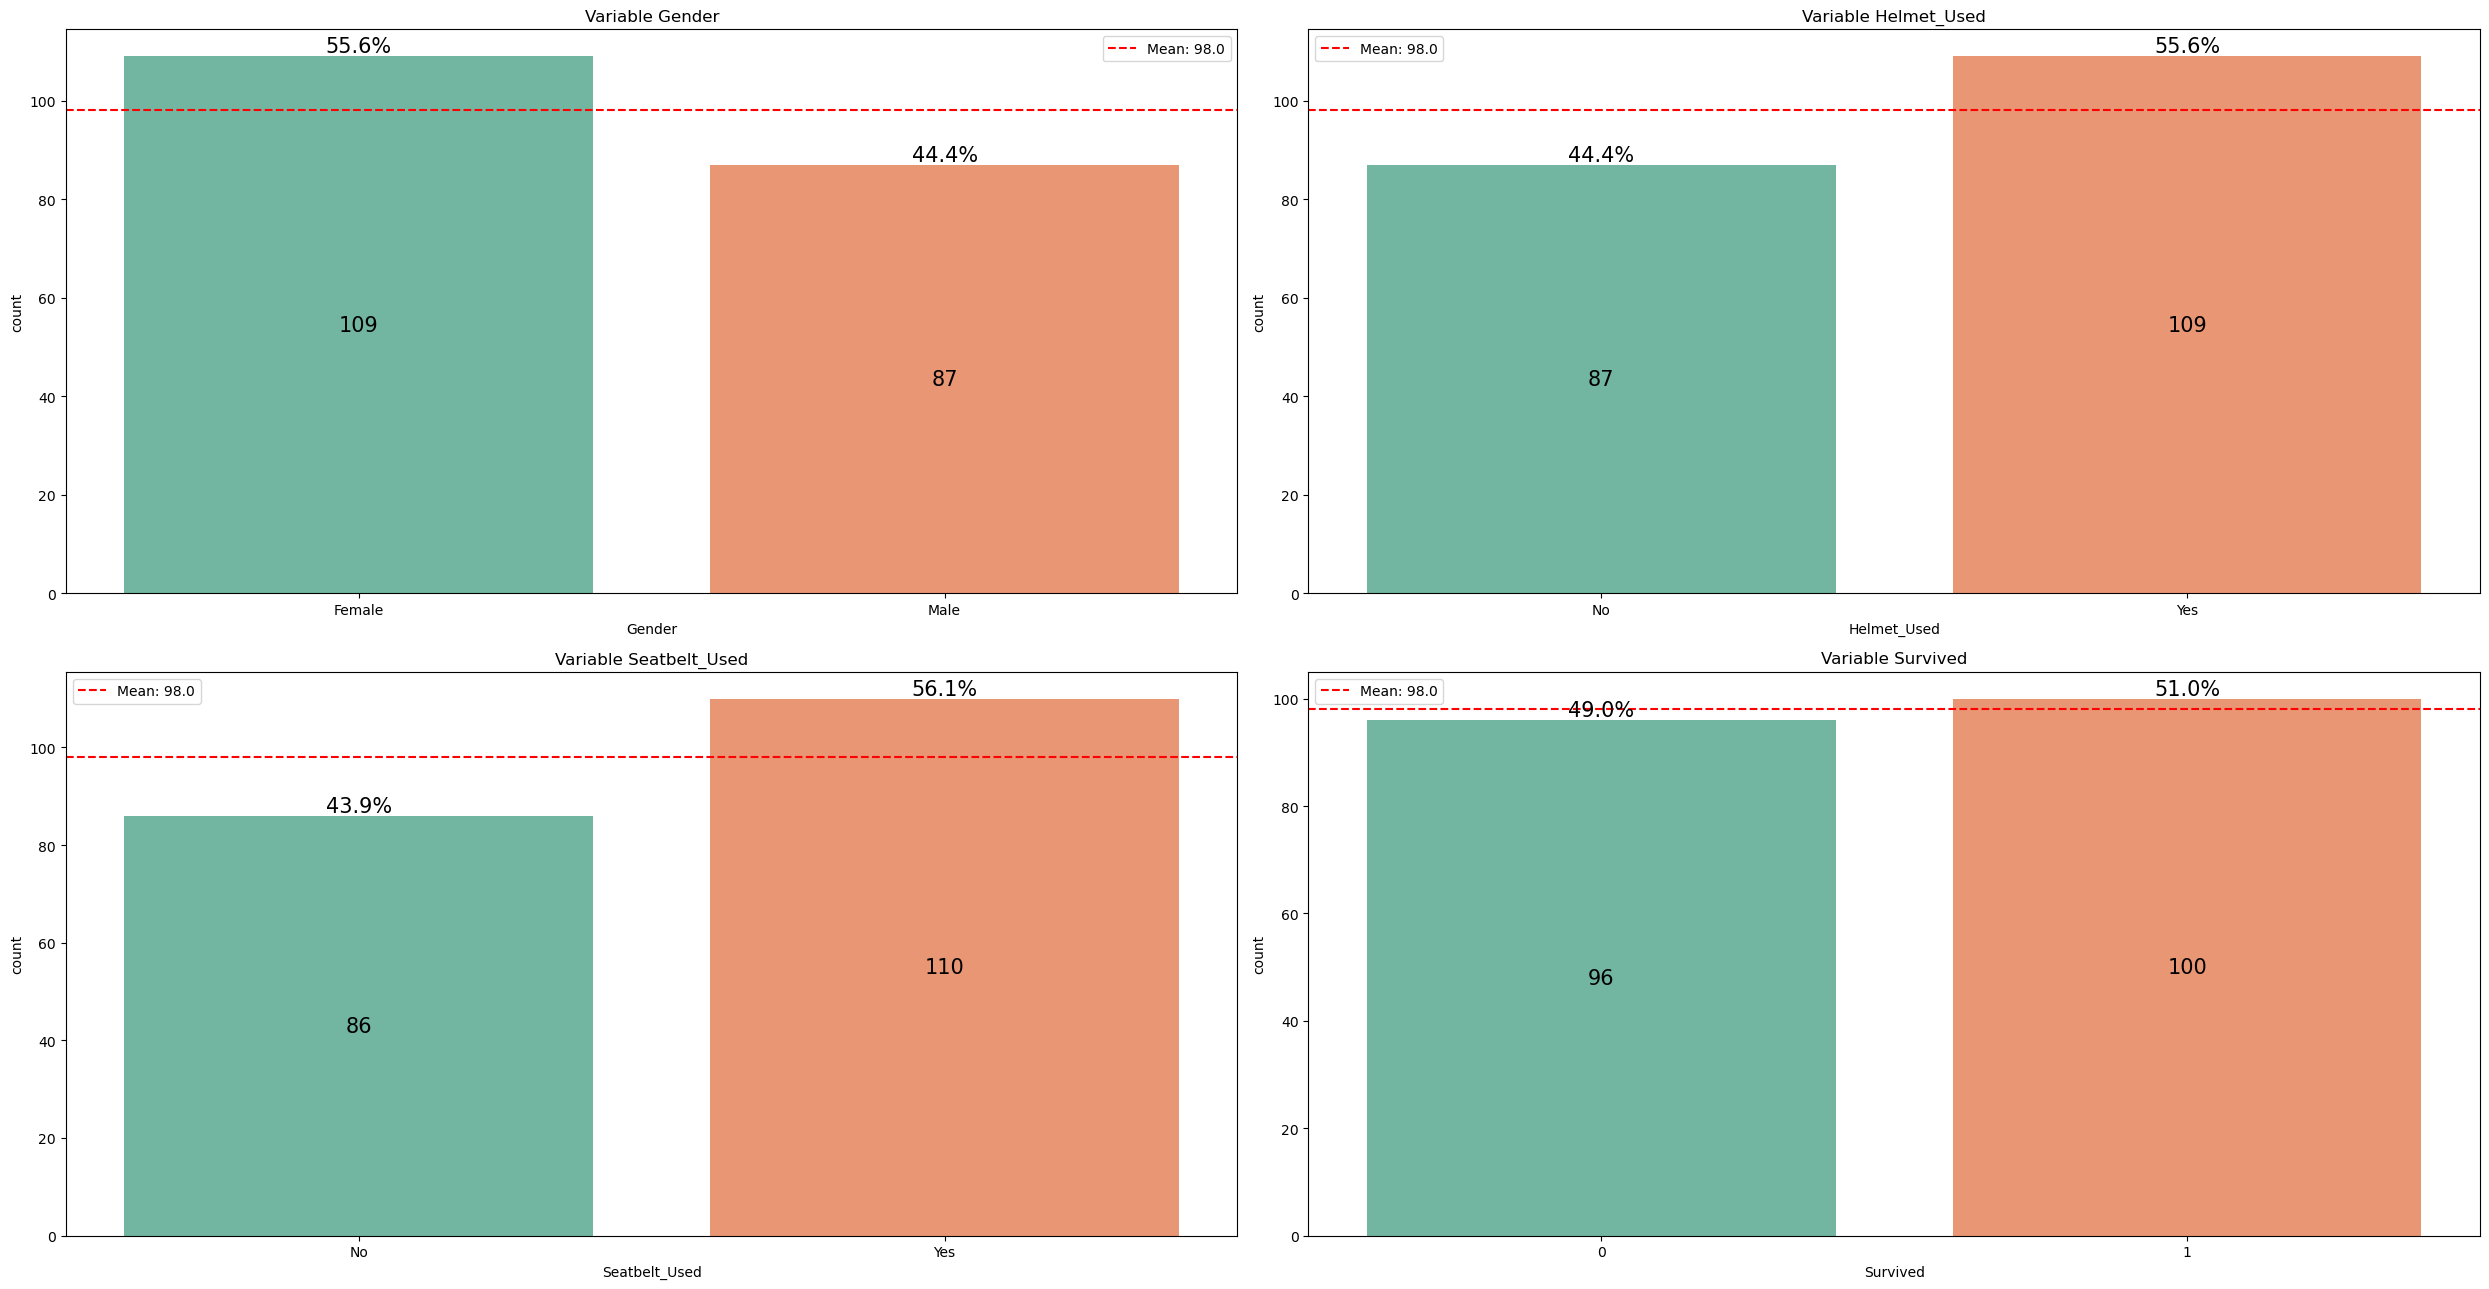

In [51]:
import matplotlib.pyplot as plt
def add_percentage(ax, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=15)

def add_mean_line(ax, total):
    heights = [p.get_height() for p in ax.patches]
    mean_count = sum(heights) / len(heights)  

    ax.axhline(mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.1f}')
    
    ax.legend()

def add_count(ax):
    for p in ax.patches:
        count = int(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() / 2  
        ax.annotate(f'{count}', (x, y), ha='center', va='center', fontsize=15)

plt.figure(figsize=(25, 13))

plt.subplot(2, 2, 1)
plt.gca().set_title('Variable Gender')
ax1 = sns.countplot(x='Gender', palette='Set2', data=df)
add_percentage(ax1, len(df['Gender']))
add_mean_line(ax1, len(df['Gender']))
add_count(ax1)

plt.subplot(2, 2, 2)
plt.gca().set_title('Variable Helmet_Used')
ax2 = sns.countplot(x='Helmet_Used', palette='Set2', data=df)
add_percentage(ax2, len(df['Helmet_Used']))
add_mean_line(ax2, len(df['Helmet_Used']))
add_count(ax2)

plt.subplot(2, 2, 3)
plt.gca().set_title('Variable Seatbelt_Used')
ax3 = sns.countplot(x='Seatbelt_Used',  palette='Set2', data=df)
add_percentage(ax3, len(df['Seatbelt_Used']))
add_mean_line(ax3, len(df['Seatbelt_Used']))
add_count(ax3)

plt.subplot(2, 2, 4)
plt.gca().set_title('Variable Survived')
ax4 = sns.countplot(x='Survived', palette='Set2', data=df)
add_percentage(ax4, len(df['Survived']))
add_mean_line(ax4, len(df['Survived']))
add_count(ax4)

plt.tight_layout()
plt.show()

Continuous Variables:
When we look at our continuous variables, we can confirm that our dataset is well distributed, despite being a small dataset. When we look at the first variable, which is age, we can see that the data is well distributed between 18 and 70 years, with some variations at certain ages and a peak around 45 years, but it is still a very well-distributed variable.
Looking at the speed of impact variable, we can see a smaller distribution, but it still exists. We can observe that the peak of accidents is around 120, which is the highest speed, but we can also verify that we have examples of accidents at all speeds.

/var/folders/06/glp713tn4y36c09c4_5ygjwr0000gn/T/ipykernel_2921/3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

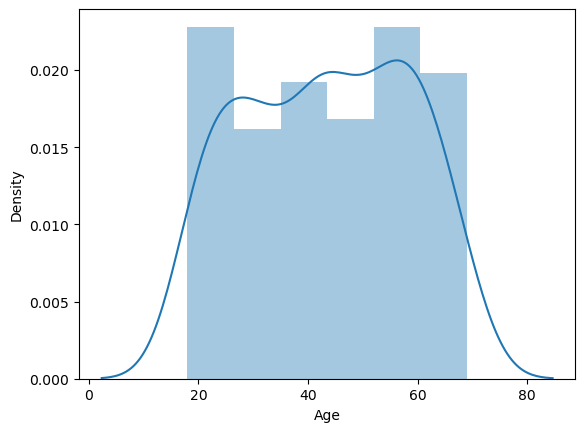

In [52]:
sns.distplot(df['Age'])

** Age is almost normally distributed,we get almost zero value of skew**

In [53]:
df['Age'].skew()

-0.05395985168266965

In [54]:
df['Age'].min()

18

In [55]:
df['Age'].max()

69

In [56]:
df['Age'].mean()

43.34183673469388

<Axes: >

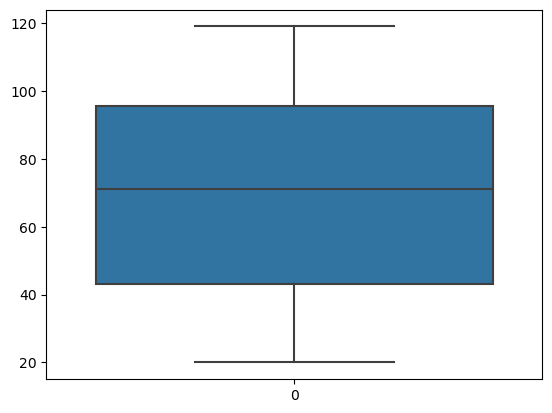

In [57]:
sns.boxplot(df['Speed_of_Impact'])

their is no outlier in a speed_of_impact

/var/folders/06/glp713tn4y36c09c4_5ygjwr0000gn/T/ipykernel_2921/737530324.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Speed_of_Impact'])


<Axes: xlabel='Speed_of_Impact', ylabel='Density'>

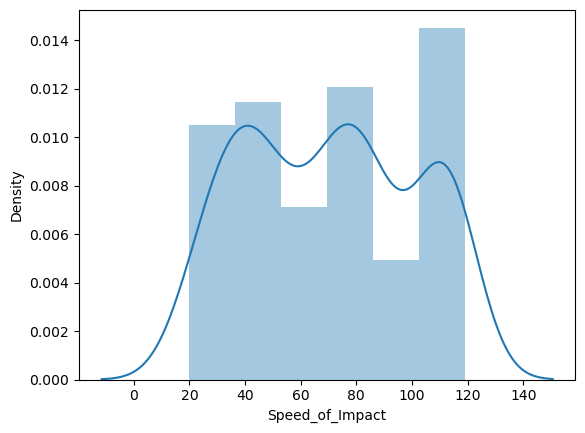

In [58]:
sns.distplot(df['Speed_of_Impact'])

<Axes: xlabel='Seatbelt_Used'>

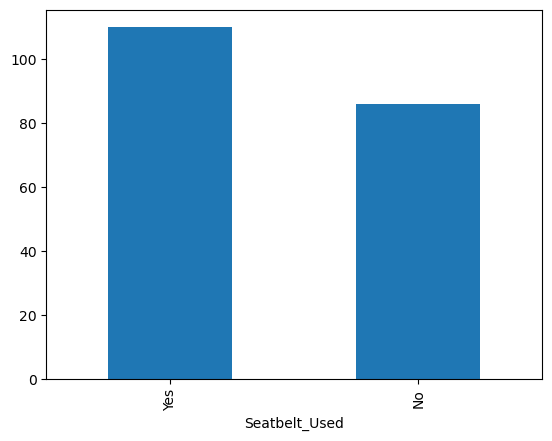

In [59]:
df['Seatbelt_Used'].value_counts().plot(kind='bar')

<Axes: xlabel='Survived'>

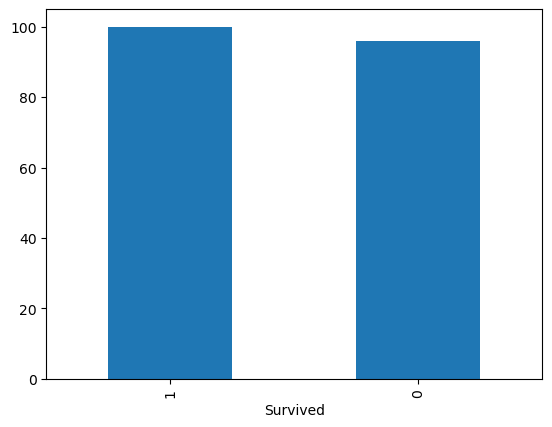

In [60]:
df['Survived'].value_counts().plot(kind='bar')

In [61]:
df['Seatbelt_Used'].value_counts()

Seatbelt_Used
Yes    110
No      86
Name: count, dtype: int64

In [62]:
df['Helmet_Used'].value_counts()

Helmet_Used
Yes    109
No      87
Name: count, dtype: int64

from the barplot and value count we conclude that their is more number of sealbelt used and helmet used and that give litlle high number of survived people

<Axes: xlabel='Speed_of_Impact', ylabel='Count'>

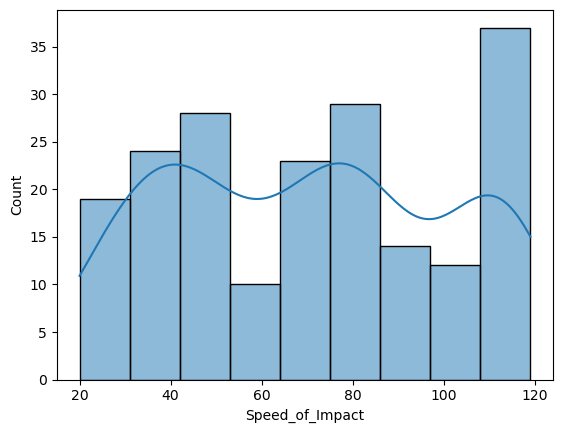

In [63]:
sns.histplot(df['Speed_of_Impact'],kde=True)

speed around 120 have highest number of accident


<Axes: >

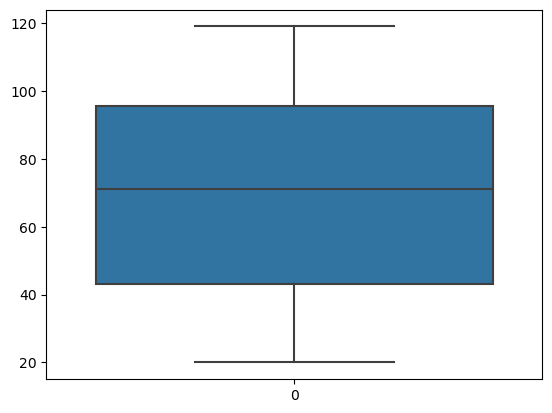

In [64]:
sns.boxplot(df['Speed_of_Impact'])


<Axes: >

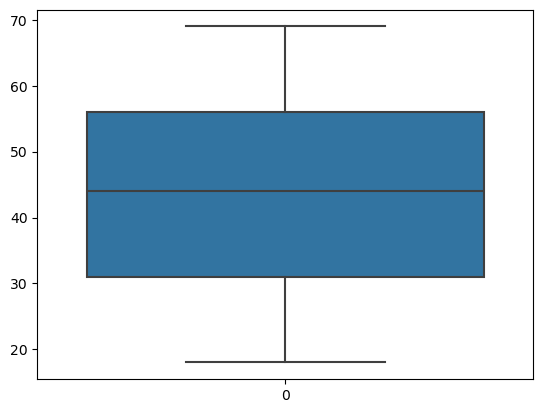

In [65]:
sns.boxplot(df['Age'])

Looking at the boxplots, we can verify that we don't have any outliers (which is great, as this means there is no need for treatment, given that we don’t have a large dataset). Looking at our age variable, we can confirm what we saw in our histogram. Our average age is 43 years, with the youngest person being 18 years old and the oldest being 69. We can also see that 50% of our data is between 18 and 44 years, and the other 50% is between 44 and 69 years

Looking at our other continuous variable, which is the accident speed, we can see that the average is 70 km/h, but we have accidents at all speeds. We can also see that 50% of our accidents are below 71 km/h, which is a number that surprised me a lot.

# Multivariate Analysis

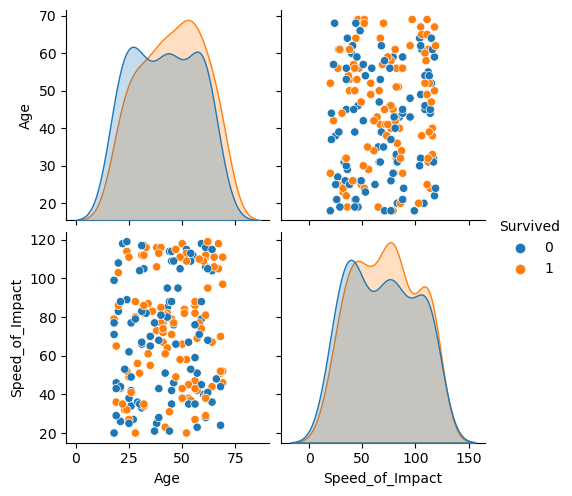

In [66]:
sns.pairplot(data=df,hue='Survived')

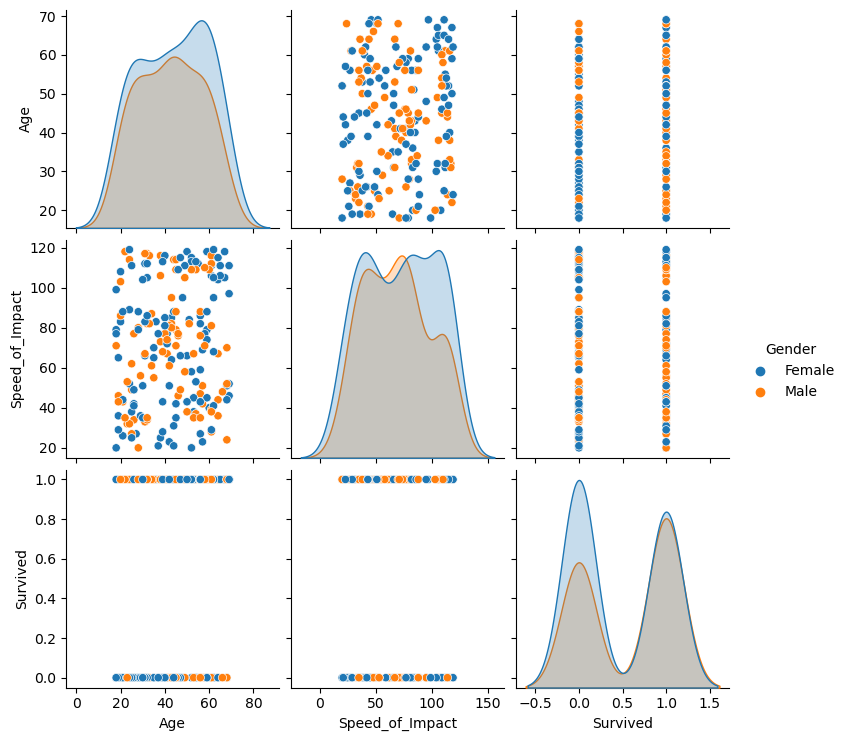

In [67]:
sns.pairplot(data=df,hue='Gender')

# #Scatter Plot(Numerical-numerical)

<Axes: xlabel='Age', ylabel='Speed_of_Impact'>

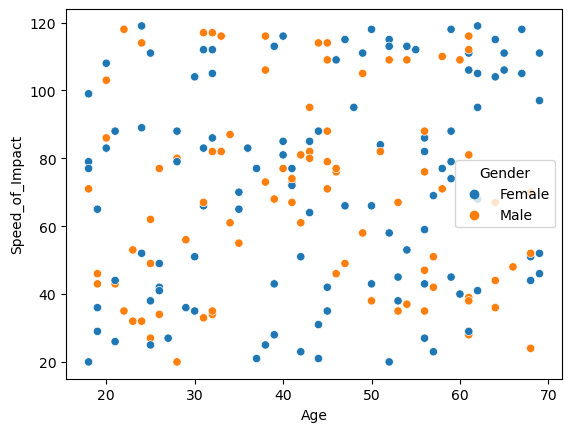

In [68]:
sns.scatterplot(data=df,x=df['Age'],y=df['Speed_of_Impact'],hue=df['Gender'])

<Axes: xlabel='Gender', ylabel='Speed_of_Impact'>

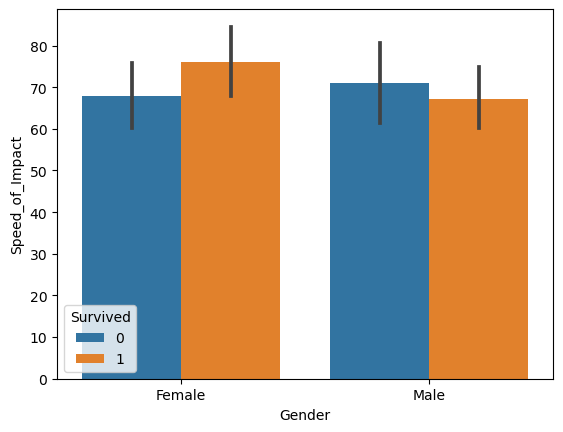

In [69]:
sns.barplot(data=df,x=df['Gender'],y=df['Speed_of_Impact'],hue=df['Survived'])

Text(0.5, 1.0, 'stripplot of Speed_of_Impact vs Survived')

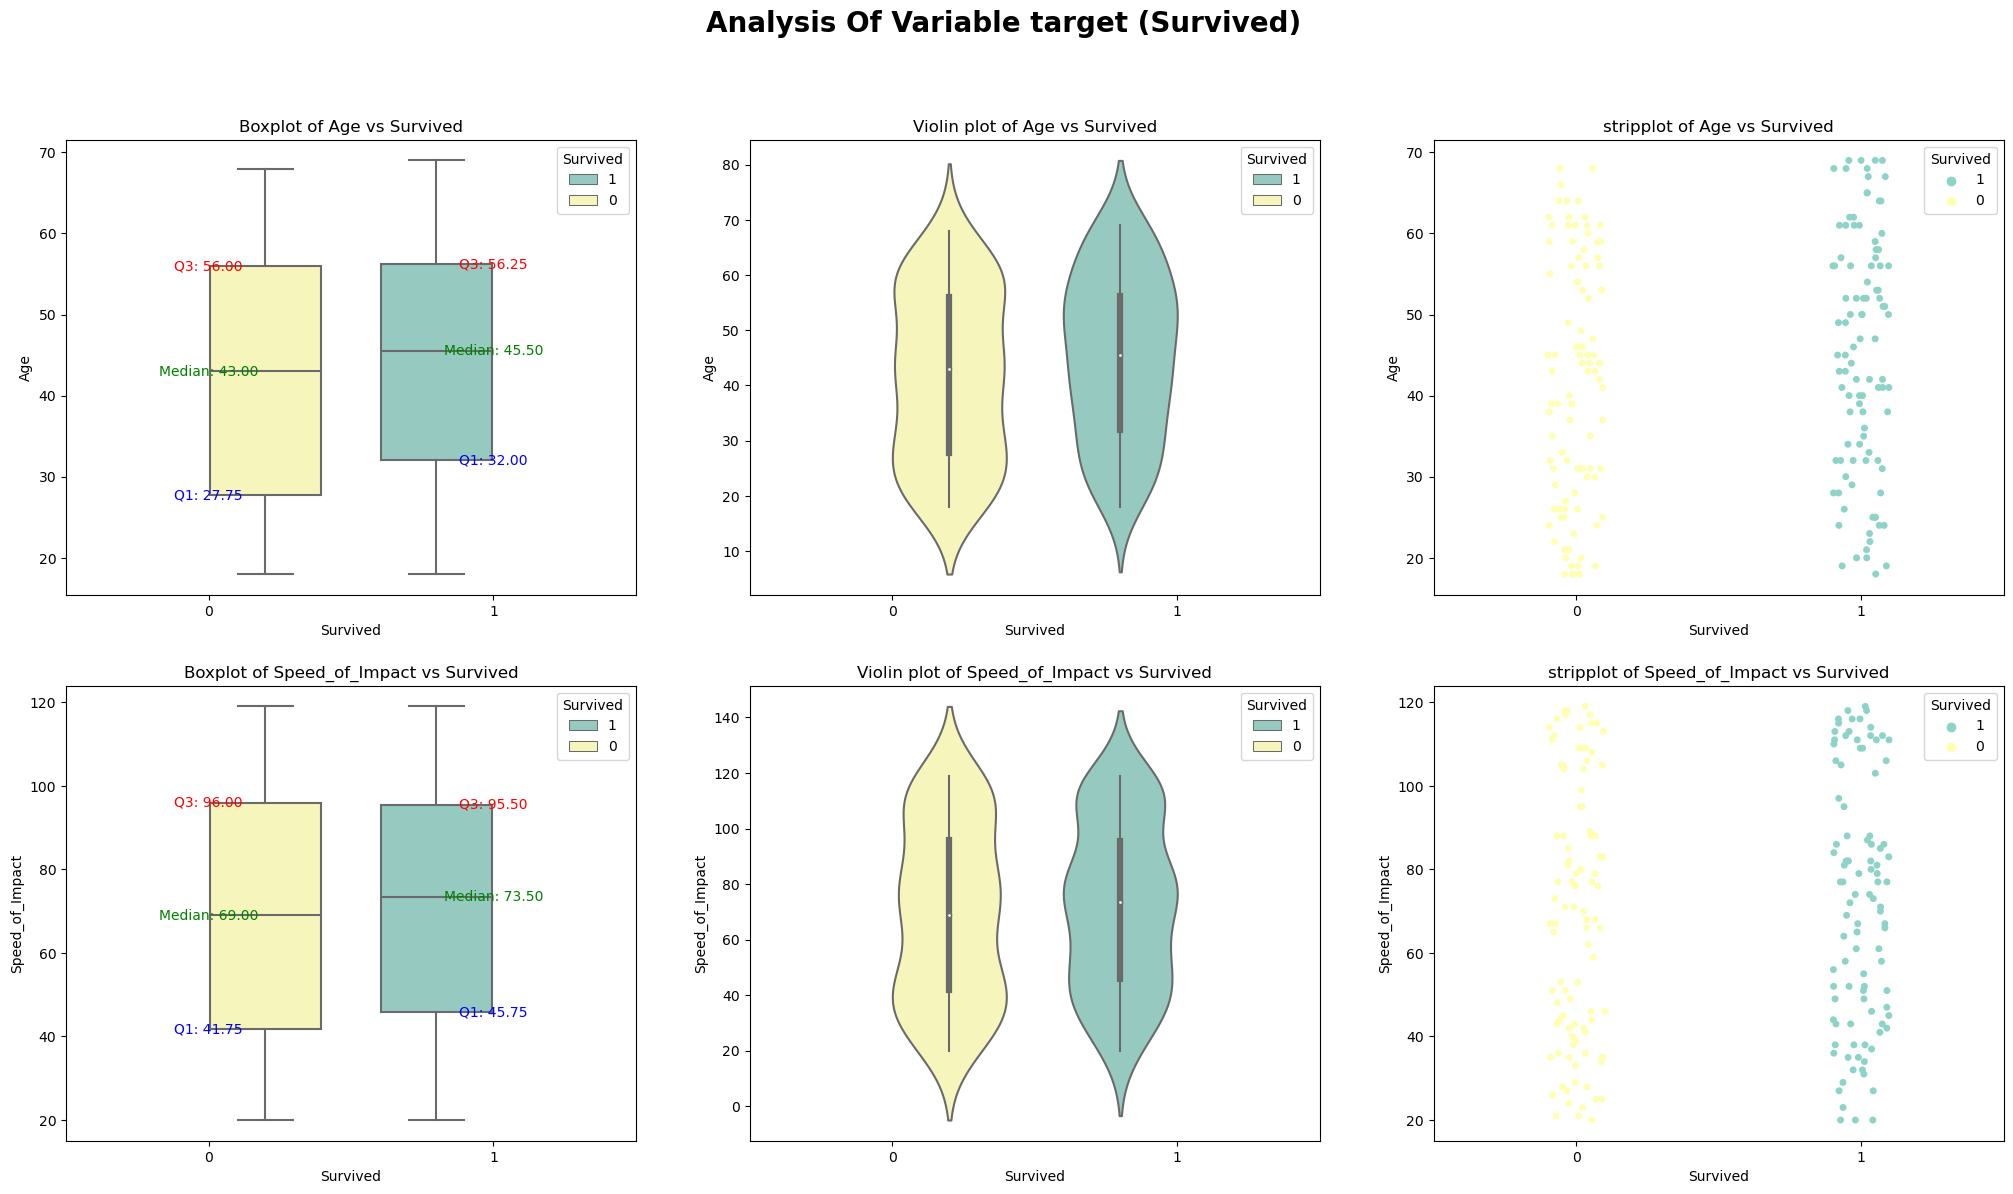

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

def add_quartile_labels_by_hue(ax, x, hue, data):
    # Calcular os quartis para cada grupo de 'hue' (Preference)
    quartiles = data.groupby(hue)[x].quantile([0.25, 0.5, 0.75]).unstack()

    # Obter as posições dos boxplots no eixo x
    positions = ax.get_xticks()  # Posições dos boxplots
    hue_values = data[hue].unique()  # Valores únicos de 'hue' (Preference)

    # Inverter a ordem das classes de hue (classe 1 primeiro, classe 0 depois)
    hue_values = hue_values[::-1]

    # Certifique-se de que os valores de 'hue' correspondem corretamente aos boxplots
    for i, pos in enumerate(positions):
        # Pegue a classe de 'hue' correspondente à posição do boxplot
        preference = hue_values[i]
        
        # Obter os quartis (Q1, Q2, Q3) para esse grupo
        Q1 = quartiles.loc[preference, 0.25]
        Q2 = quartiles.loc[preference, 0.5]  # Mediana
        Q3 = quartiles.loc[preference, 0.75]

        # Adicionar as anotações para os quartis (Q1, Mediana e Q3) na posição correta
        ax.text(pos, Q1, f'Q1: {Q1:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax.text(pos, Q2, f'Median: {Q2:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='green')
        ax.text(pos, Q3, f'Q3: {Q3:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='red')


plt.figure(figsize=(25, 13))
plt.suptitle("Analysis Of Variable target (Survived)", fontweight="bold", fontsize=20)

plt.subplot(2, 3, 1)
ax1 = sns.boxplot(x='Survived', y='Age', data=df, hue="Survived", palette='Set3', hue_order=[1, 0])
plt.title('Boxplot of Age vs Survived')
add_quartile_labels_by_hue(ax1, 'Age', 'Survived', df)

plt.subplot(2, 3, 2)
ax2 = sns.violinplot(x='Survived', y='Age', data=df, hue="Survived", palette='Set3', hue_order=[1, 0])
plt.title('Violin plot of Age vs Survived')

plt.subplot(2, 3, 3)
ax3 = sns.stripplot(x='Survived', y='Age', data=df, hue="Survived", palette='Set3', hue_order=[1, 0])
plt.title('stripplot of Age vs Survived')

plt.subplot(2, 3, 4)
ax4 = sns.boxplot(x='Survived', y='Speed_of_Impact', data=df, hue="Survived", palette='Set3', hue_order=[1, 0])
plt.title('Boxplot of Speed_of_Impact vs Survived')
add_quartile_labels_by_hue(ax4, 'Speed_of_Impact', 'Survived', df)

plt.subplot(2, 3, 5)
ax5 = sns.violinplot(x='Survived', y='Speed_of_Impact', data=df, hue="Survived", palette='Set3', hue_order=[1, 0])
plt.title('Violin plot of Speed_of_Impact vs Survived')

plt.subplot(2, 3, 6)
ax6 = sns.stripplot(x='Survived', y='Speed_of_Impact', data=df, hue="Survived", palette='Set3', hue_order=[1, 0])
plt.title('stripplot of Speed_of_Impact vs Survived')

Trying to analyze the age of our users with the impact speed to check if younger people are more likely to drive faster, we couldn’t find any pattern between age and impact speed.

Text(0.5, 1.0, 'Scatterplot of Age vs Speed_of_Impact')

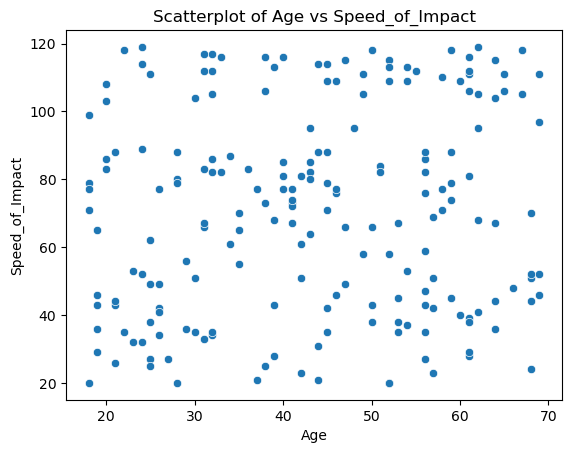

In [71]:
axes = []

axes.append(plt.subplot(1, 1, 1))
sns.scatterplot(x='Age', y='Speed_of_Impact', data=df)
plt.title('Scatterplot of Age vs Speed_of_Impact')

Comparing our age variable with helmet/seat belt usage, although there is a slight difference, we couldn’t find much difference between people who use them and those who don’t.

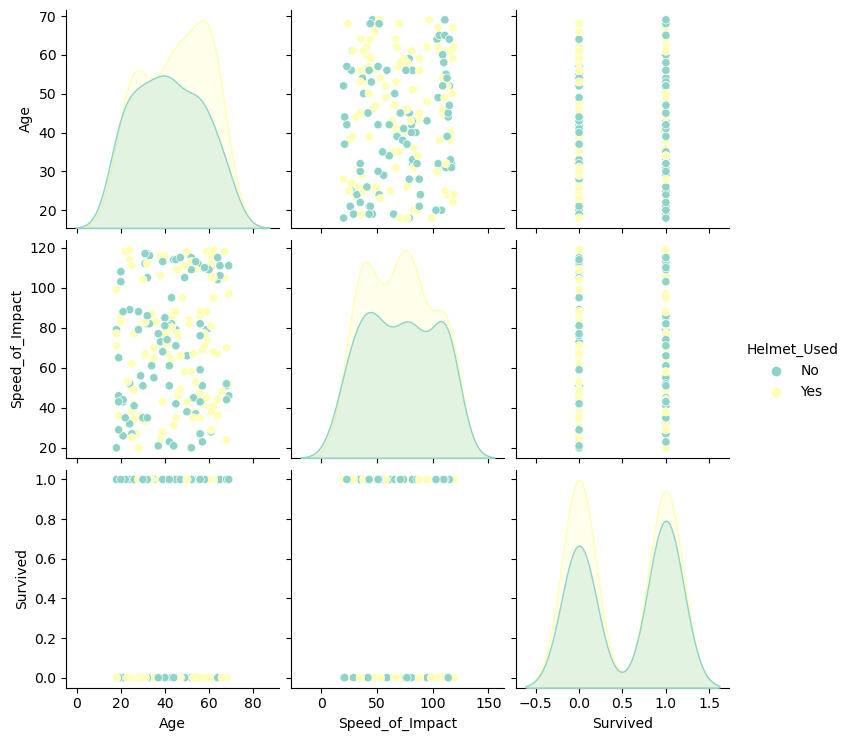

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='Helmet_Used', palette='Set3')
plt.show()


Now, in our final analysis, we got a very interesting result. We found that higher-speed impacts are much more likely to involve females than males, with a significant difference. When we look at our Q4 and compare, we can see that the top 25% of female accidents are between 104 and 120 km/h, whereas for males, this range is from 86.50 to 120 km/h